In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from mlapp_models.gaussian_process import (
    GaussianProcessClassifier,
    GaussianProcessRegressor,
)
from mlapp_models.utils import contour_plot

# Gaussian Processes

Chapter 15

## Create Data

In [3]:
n_train = 10
X_train = np.random.uniform(low=-20, high=20, size=(n_train, 1))
y_train = np.random.normal(size=(n_train,))

## Gaussian Process for Regression

Section 15.2

In [4]:
gp_regressor = GaussianProcessRegressor(var_eps=0.1, var0=1, ell=3)
gp_regressor.fit(X_train, y_train)

X_test = np.linspace(-20, 20, 1000).reshape(-1, 1)
mu_star, covar_star = gp_regressor.predict(X_test)
sigma_star = np.diag(covar_star) ** 0.5

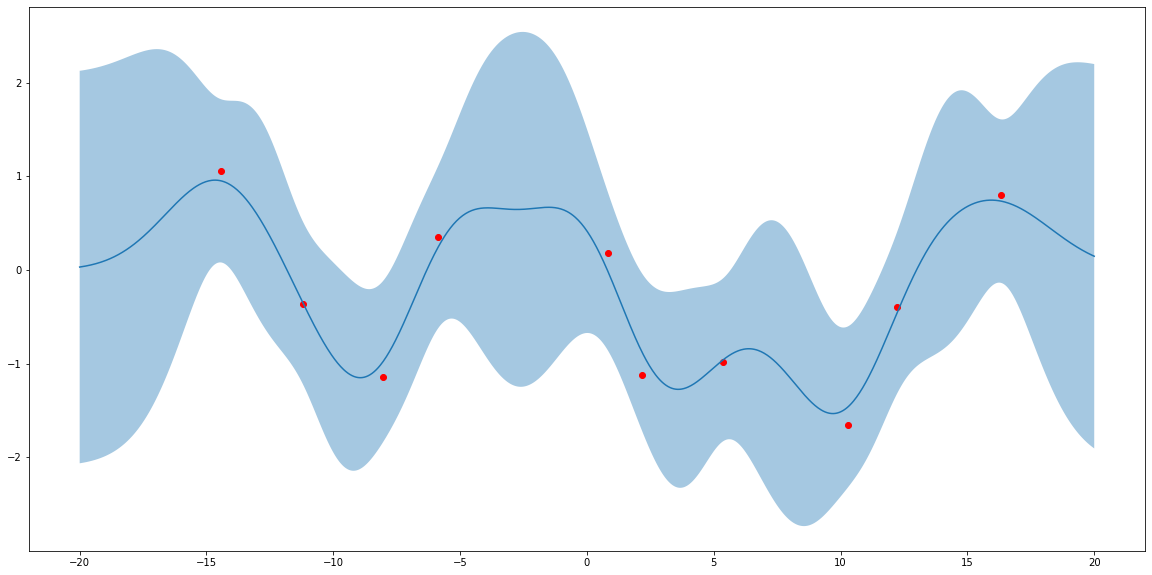

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train, "ro")
plt.plot(X_test, mu_star)
plt.fill_between(
    X_test.reshape(-1), mu_star + 2 * sigma_star, mu_star - 2 * sigma_star, alpha=0.4
)

# Gaussian Process for Binary Classification

Section 15.3.1

In [6]:
X_train, y_train = datasets.make_blobs(
    n_samples=80, centers=np.array([[1.5, 0], [0, -1.5]])
)
y_train = y_train * 2 - 1

In [7]:
gp_classifier = GaussianProcessClassifier(
    var_eps=0.005,
    var0=0.1,
    ell=0.8,
)
# `var0` and `ell` can cause numerical instability.

In [8]:
gp_classifier.fit(X_train, y_train, n_iter=400)

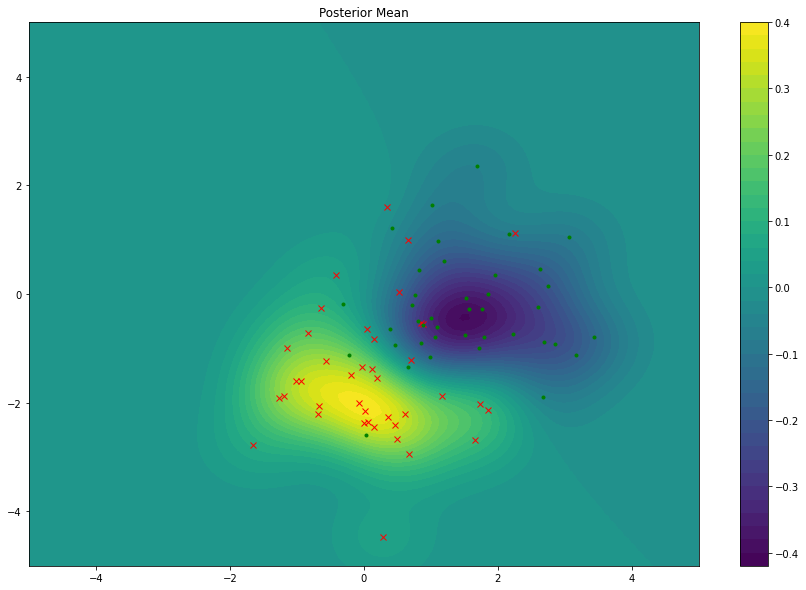

In [9]:
plt.figure(figsize=(15, 10))

(cp,) = contour_plot(
    [gp_classifier.predict_mean],
    plt.contourf,
    x_range=5,
    y_range=5,
    contour_kwargs={"levels": 50},
)
plt.colorbar(cp)  # Add a colorbar to a plot
plt.plot(*X_train[y_train == 1].T, "rx")
plt.plot(*X_train[y_train == -1].T, "g.")
plt.title("Posterior Mean")
plt.show()

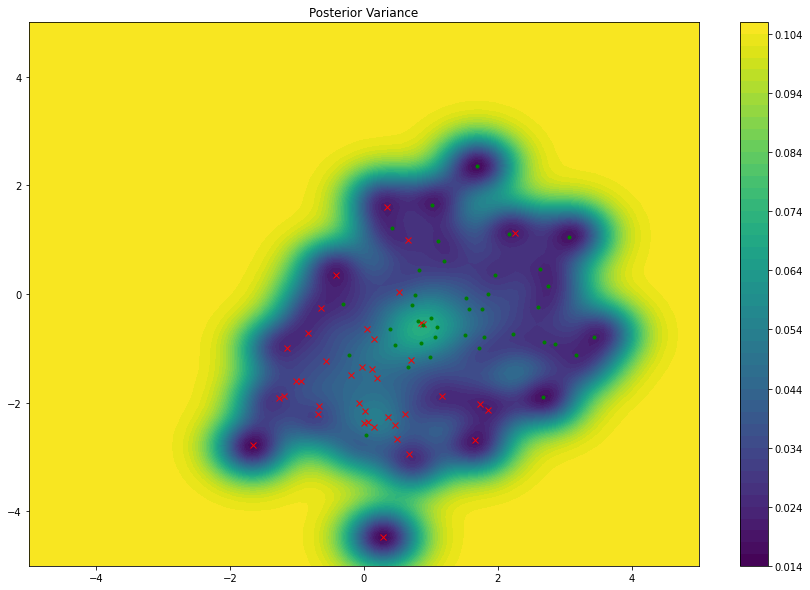

In [10]:
plt.figure(figsize=(15, 10))

(cp,) = contour_plot(
    [lambda x: np.diag(gp_classifier.predict_var(x))],
    plt.contourf,
    x_range=5,
    y_range=5,
    contour_kwargs={"levels": 50},
)
plt.colorbar(cp)  # Add a colorbar to a plot
plt.plot(*X_train[y_train == 1].T, "rx")
plt.plot(*X_train[y_train == -1].T, "g.")
plt.title("Posterior Variance")
plt.show()